In [1]:
%pylab inline

import copy

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=6, linewidth=110)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0, '../../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics
import uncertaintysampling as us

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(us)

import constants
imp.reload(constants)
from constants import *

In [3]:
def plot_2d_func(axes, func, xlow, xhigh, nx, ylow, yhigh, ny, 
                 interpolation='bicubic', colorbar=True, colorbar_label='z'):
    """Generate a heatmap from the function func.
    """
    # Generate 2d array of z-values
    xs = np.linspace(xlow, xhigh, nx)
    ys = np.linspace(ylow, yhigh, ny)
    zgrid = np.array([[func(x, y) for y in ys] for x in xs])
    
    # Make the plot
    extent = [xs[0], xs[-1], ys[0], ys[-1]]
    im = axes.imshow(zgrid.T, interpolation=interpolation, origin='lower', 
                 extent=extent, aspect='auto')
    
    # Make the colorbar
    if colorbar:
        cb = plt.colorbar(mappable=im, ax=axes)
        cb.set_label(label=colorbar_label)
        
        
def plot_numbered_points(axes, points):
    """
    """
    for i in range(len(points)-1):
        axes.scatter(points[i, 0], points[i, 1], marker='$'+str(i)+'$', s=100, color='r')
        
    axes.scatter(points[-1, 0], points[-1, 1], marker='$'+str(len(points)-1)+'$', s=150, color='orange')

# Load surrogate model

In [4]:
# gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_corners_lhd_xi.hdf5'
# gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_corners_lhd_xi.hdf5'
# nodes_filename = '../../data/TEOBv4QM_production/nodes_corners_lhd_xi.hdf5'
# sur = surrogate.GPSplineSurrogate.load(
#     nodes_filename, gp_amp_filename, gp_phase_filename, 
#     order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_corners_lhd_xi_sqexp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_corners_lhd_xi_sqexp.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_corners_lhd_xi_sqexp.hdf5'
sur = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

In [5]:
# params = np.array([1., 0., 0., 1000., 1000.])
# h = sur.geometric_waveform(params)
# wave.plot_waveforms_fd([h])

In [6]:
# print sur.mf_phase
# print sur.mf_phase[:33]

# Add new points with uncertainty sampling

In [7]:
# Do coordinate transformation
def lam_of_xi(xi, a=100):
    return a*(10**xi - 1)

def xi_of_lam(lam, a=100):
    return np.log10(lam/a + 1)

In [8]:
# original_points = sur.dphase_gp_list[0].X_train_
# limits = np.array([[1.0/3.0, 1.0], [-0.5, 0.5], [-0.5, 0.5], [0, 5000], [0, 5000]])
# kernel_type = 'matern52'
# dphase_gp_list = sur.dphase_gp_list
# # Use the first nmax nodes in calculating the RMS phase error
# nmax = 33

# sampler = us.UncertaintySampling(original_points, limits, kernel_type, dphase_gp_list, nmax=nmax)

In [11]:
ximin = xi_of_lam(0)
ximax = xi_of_lam(5000)
print ximin, ximax
# Parameters for the training set

limits = np.array([[1.0/3.0, 1.0], [-0.5, 0.5], [-0.5, 0.5], [0, ximax], [0, ximax]])

original_points = sur.dphase_gp_list[0].X_train_
#kernel_type = 'matern52'
kernel_type = 'squaredexponential'
dphase_gp_list = sur.dphase_gp_list
# Use the first nmax nodes in calculating the RMS phase error
nmax = 33

sampler = us.UncertaintySampling(original_points, limits, kernel_type, dphase_gp_list, nmax=nmax)

 0.0 1.7075701760979363


In [139]:
sampler.add_new_points(25, nbasinjumps=50, nfun_eval_per_basin=15, verbose=True)

0 err_new=0.18879718834896045, neval=5202, evaluation time=1529.09049201
point_new=[ 1.       -0.499998 -0.5       0.        0.728854]
1 err_new=0.1873959102206708, neval=4998, evaluation time=1699.16044497
point_new=[0.727727 0.499999 0.10379  0.999703 1.707569]
2 err_new=0.1755404944922409, neval=5226, evaluation time=6004.27868009
point_new=[ 0.896963 -0.499989 -0.087012  1.70757   1.70757 ]
3 err_new=0.1872399130456916, neval=5088, evaluation time=2122.01234889
point_new=[ 0.500484  0.253559 -0.449131  1.70757   1.70757 ]
4 err_new=0.19269821241043997, neval=5142, evaluation time=2532.18238091
point_new=[ 1.000000e+00  2.534508e-01 -5.000000e-01  5.027226e-08  1.603636e+00]
5 err_new=0.17927452294616456, neval=5004, evaluation time=2507.10569215
point_new=[1.       0.208083 0.5      1.70757  1.70757 ]
6 err_new=0.1785102886888135, neval=5058, evaluation time=3044.85339499
point_new=[ 0.333334 -0.097304  0.5       0.525807  1.70757 ]
7 err_new=0.17967227993297694, neval=4944, evalua

In [140]:
points_errors = np.concatenate((sampler.new_points.T, np.array([sampler.new_errors]))).T

# Convert back from xi to lambda
points_errors_rescale = copy.copy(points_errors)
points_errors_rescale[:, 3] = lam_of_xi(points_errors_rescale[:, 3])
points_errors_rescale[:, 4] = lam_of_xi(points_errors_rescale[:, 4])

print len(points_errors)

#np.savetxt('../../data/TEOBv4QM_production/uncsamp_from_lhd_trainset_xi.txt', points_errors_rescale)
np.savetxt('../../data/TEOBv4QM_production/uncsamp_from_lhd_trainset_xi_sqexp.txt', points_errors_rescale)

400


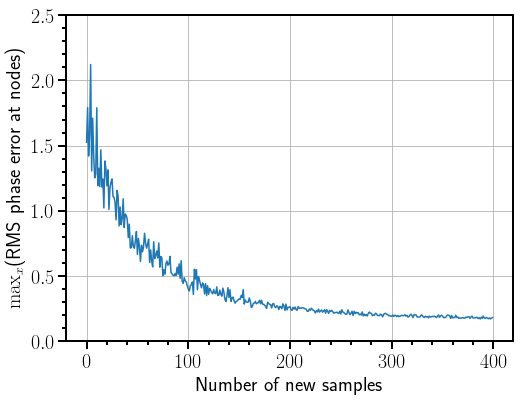

In [147]:
fig, axes = plt.subplots(1, figsize=(8, 6))
axes.plot(sampler.new_errors)
#axes.scatter(360, 0.343, label='')
axes.set_xlabel('Number of new samples')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_ylim(0, 2.5)
axes.grid()
#axes.set_xscale('log')

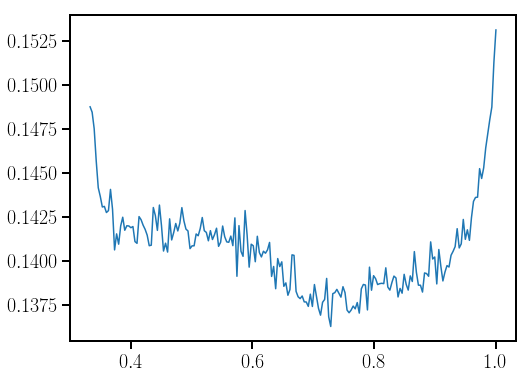

In [142]:
# x0, x1, x2, x3, x4 = 1.0, 0.5, -0.5, xi_of_lam(5000.), xi_of_lam(0.)
x0, x1, x2, x3, x4 = 1.0, 0.2, -0.3, xi_of_lam(300.), xi_of_lam(1000.)

def mismatch_error_1d(x0):
    point = np.array([x0, x1, x2, x3, x4])
    return -sampler.negative_error(point)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
xlow, xhigh, nx = limits[0, 0], limits[0, 1], 200
x0s = np.linspace(xlow, xhigh, nx)
ys = np.array([mismatch_error_1d(x0) for x0 in x0s])
ax.plot(x0s, ys)

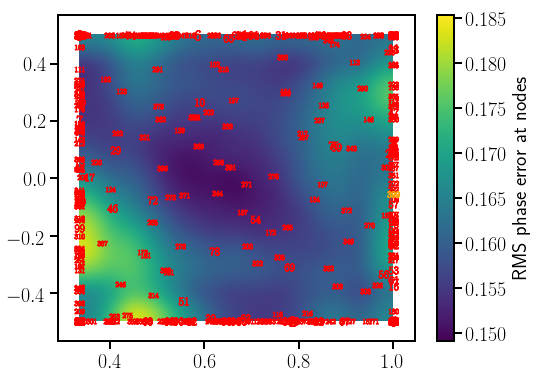

In [143]:
# x0, x1, x2, x3, x4 = 1.0, 0.5, -0.5, 5000., 0.
x0, x1, x2, x3, x4 = 1.0, 0.5, -0.5, xi_of_lam(5000.), xi_of_lam(0.)
def mismatch_error_2d(x0, x1):
    point = np.array([x0, x1, x2, x3, x4])
    return -sampler.negative_error(point)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
xlow, xhigh, nx = limits[0, 0], limits[0, 1], 15
ylow, yhigh, ny = limits[1, 0], limits[1, 1], 15
plot_2d_func(ax, mismatch_error_2d, xlow, xhigh, nx, ylow, yhigh, ny, 
             colorbar_label=r'RMS phase error at nodes')
plot_numbered_points(ax, sampler.new_points)

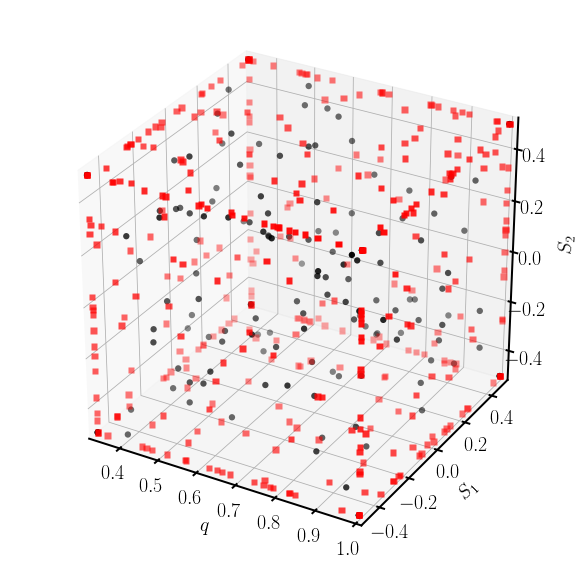

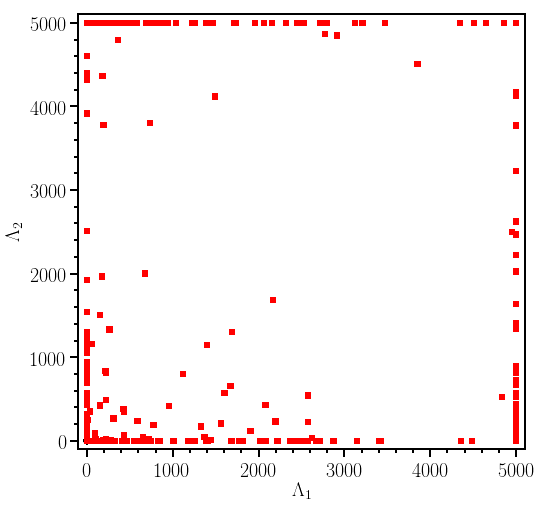

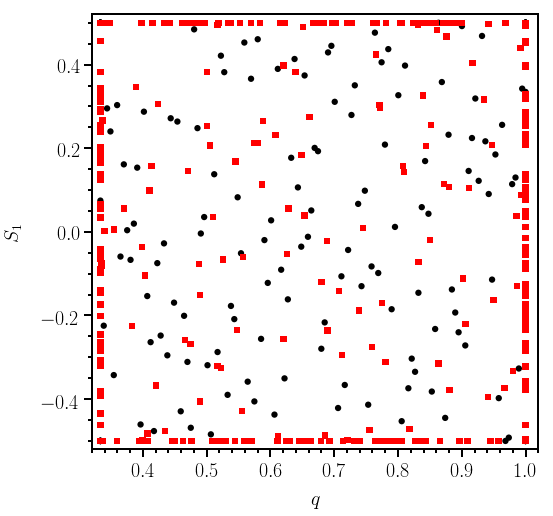

In [144]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = original_points[:, 0], original_points[:, 1], original_points[:, 2]
axes.scatter(x, y, z, c='k', edgecolor='none', marker='o', s=40)

x, y, z = points_errors_rescale[:, 0], points_errors_rescale[:, 1], points_errors_rescale[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=40)

axes.set_xlim(0.333, 1.0)
axes.set_ylim(-0.5, 0.5)
axes.set_zlim(-0.5, 0.5)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)
#axes.minorticks_on()


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = original_points[:, 3], original_points[:, 4]
axes.scatter(x, y, c='k', edgecolor='none', marker='o', s=40)

x, y = points_errors_rescale[:, 3], points_errors_rescale[:, 4]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=40)

axes.set_xlim(-100, 5100)
axes.set_ylim(-100, 5100)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = original_points[:, 0], original_points[:, 1]
axes.scatter(x, y, c='k', edgecolor='none', marker='o', s=40)

x, y = points_errors_rescale[:, 0], points_errors_rescale[:, 1]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=40)

axes.set_xlim(0.32, 1.02)
axes.set_ylim(-0.52, 0.52)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.minorticks_on()

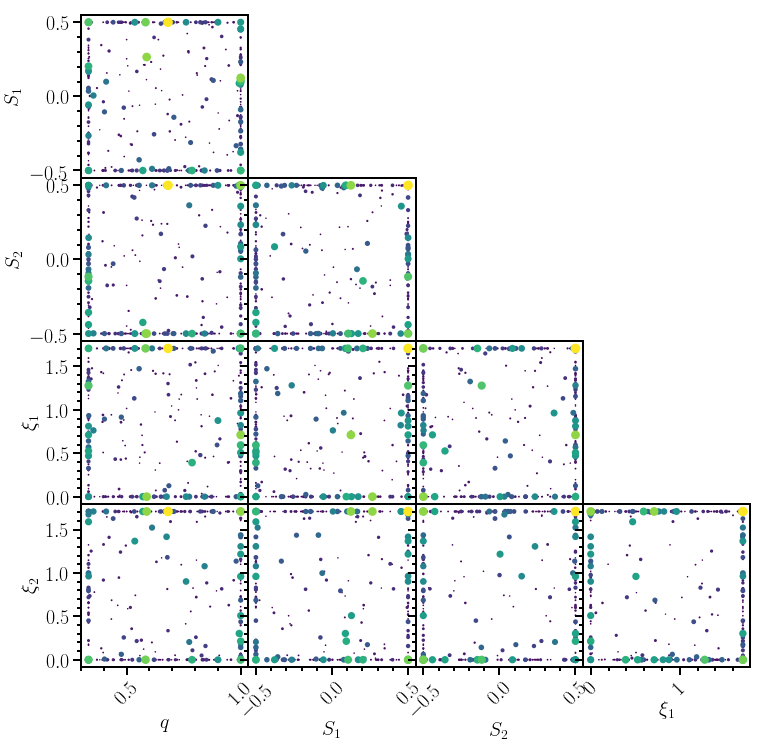

In [145]:
labels = [r'$q$', r'$S_1$', r'$S_2$', r'$\xi_1$', r'$\xi_2$']
params = sampler.new_points
error = sampler.new_errors
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, figsize=(10, 10))

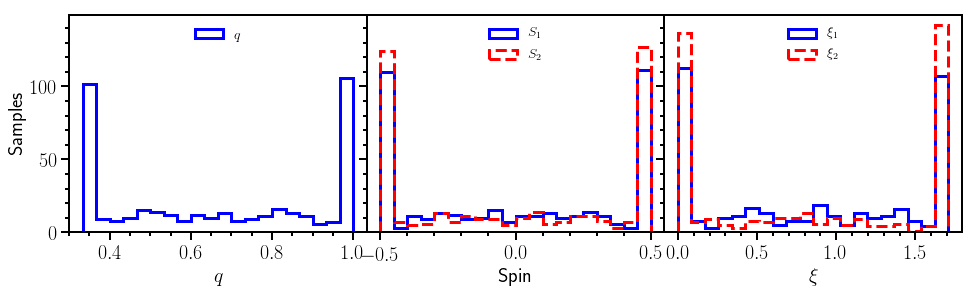

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
fig.subplots_adjust(wspace=0.0)


# Mass ratio
ax1.hist(sampler.new_points[:, 0], bins=20, histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'$q$')
ax1.set_xlabel(labels[0])
ax1.set_ylabel('Samples')
ax1.legend(loc='upper center', frameon=False)
ax1.minorticks_on()


# Spins
ax2.hist(sampler.new_points[:, 1], bins=20, histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'$S_1$')

ax2.hist(sampler.new_points[:, 2], bins=20, histtype='step', 
          ls='--', lw=3, color='red', alpha=1.0, label=r'$S_2$')

ax2.set_xlabel('Spin')
ax2.legend(loc='upper center', frameon=False)
ax2.minorticks_on()


# Tidal parameters
ax3.hist(sampler.new_points[:, 3], bins=20, histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'$\xi_1$')

ax3.hist(sampler.new_points[:, 4], bins=20, histtype='step', 
          ls='--', lw=3, color='red', alpha=1.0, label=r'$\xi_2$')

ax3.set_xlabel(r'$\xi$')
ax3.legend(loc='upper center', frameon=False)
ax3.minorticks_on()